### Importing Libraries

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [216]:
df = pd.read_csv('Titanic-Dataset.csv')

In [217]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
df.columns
df.shape

(891, 12)

## Data Decription

### Categorical Columns - Survived, PClass, Sex, SibSp (Sibling Spouse), Parch (Parent Child), Embarked (Cities covering) 
### Numerical Columns - Age, Fare, PassengerId
### Mixed Columns - Name, Ticket, Cabin

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Exploratory Data Analysis 

### Data Preprocessing 

#### Handling Missing data 

In [220]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [221]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Visualization

#### Visualisation of Missing values using seaborn library

<Axes: >

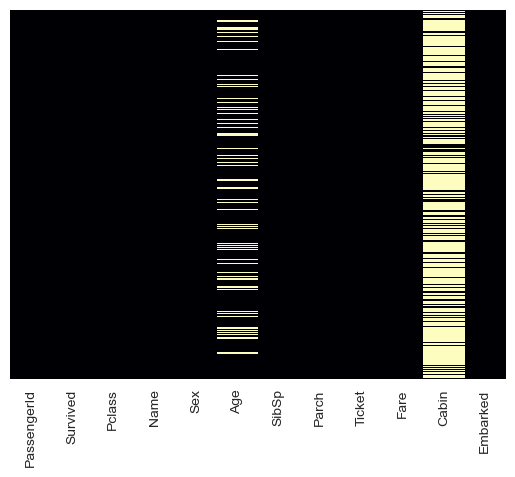

In [222]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

### Conclusion: 
#### 1. Missing Values in Age, Cabin and Embarked columns
#### 2. More than 70% values are missing in cabin column - So, we have to drop that column 

In [223]:
df.drop(columns = ['Cabin'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Data Imputation of Age Column by their mean 

In [224]:
df['Age'].fillna(df['Age'].mean(),inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

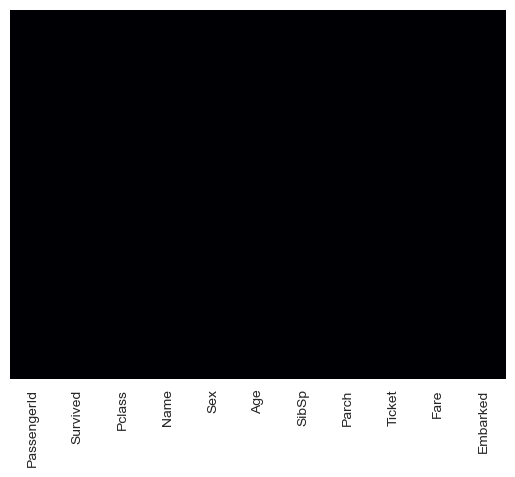

In [225]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma') # To check any missing values are there or not

### Data Imputation of Embarked cities by maximum value counts 

In [226]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [227]:
df['Embarked'].fillna('S',inplace = True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Note: No missing values in our data now

### Changing Datatypes for the following columns

In [228]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [230]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


### Univariate Analysis

#### Our target column is Survived column - we have to analyse how many persons already died 

Out of 891, 62% people died in the accident


E:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


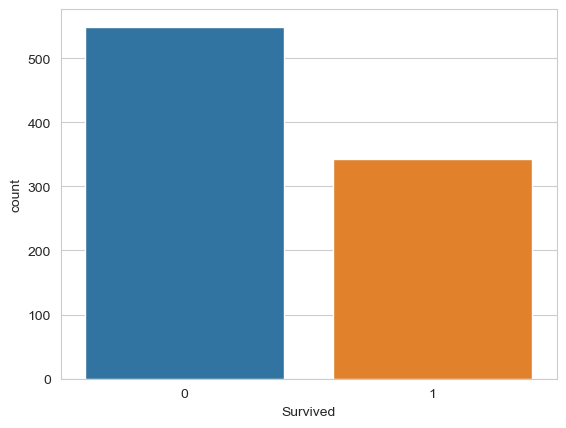

In [231]:
#sns.countplot(df['Survived'])
sns.countplot(x='Survived',data=df)
death_percent = round((df['Survived'].value_counts().values[0]/891)*100)
print("Out of 891, {}% people died in the accident".format(death_percent))

### Analysis of passenger class

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


E:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Pclass', ylabel='count'>

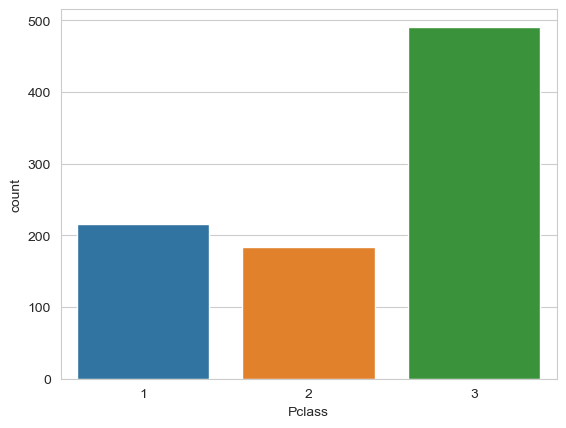

In [232]:
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(x='Pclass',data=df)

#### Conclusion: Here, it is observed most passengers avail class 3 because it may be cheaper comparatively 

### Analysis on Gender

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


E:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Sex', ylabel='count'>

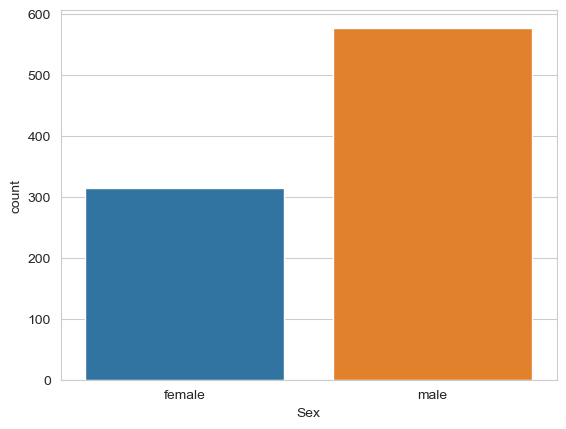

In [233]:
print((df['Sex'].value_counts()/891)*100)
sns.countplot(x='Sex',data=df)

### Analysis on Sib ling Spouse (SibSp)

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


<Axes: xlabel='SibSp', ylabel='count'>

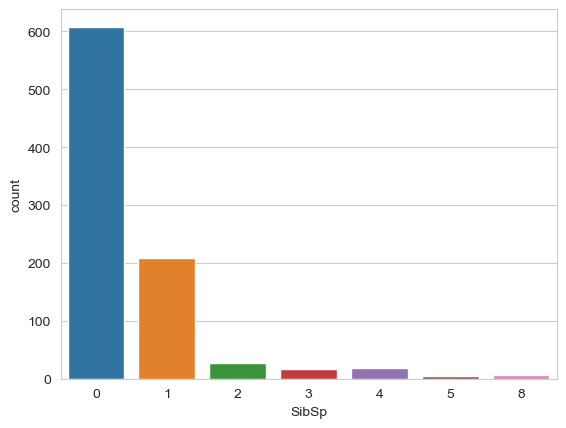

In [234]:
print((df['SibSp'].value_counts()/891)*100)
sns.countplot(x='SibSp',data=df)

### Analysis on Parch (Parent Child)

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

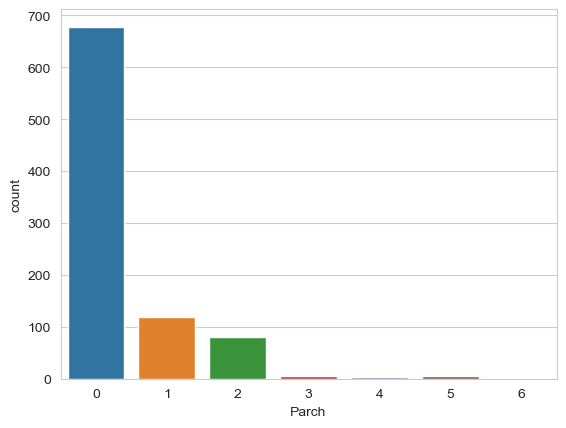

In [235]:
print((df['Parch'].value_counts()/891)*100)
sns.countplot(x='Parch',data=df)

### Analysis on embarked cities travelled by Titanic

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


E:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Embarked', ylabel='count'>

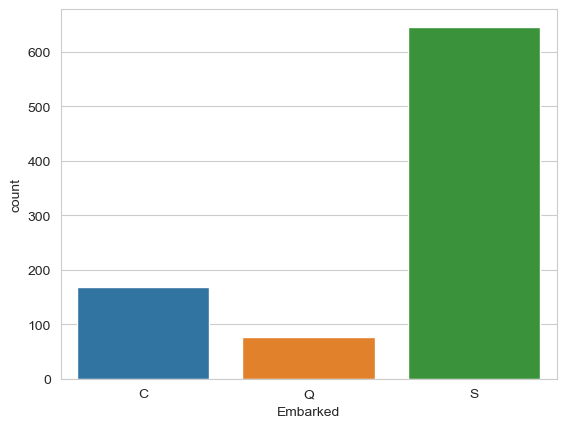

In [236]:
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(x='Embarked',data=df)

### Analysis on Age distribution

C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_9460\350049838.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.45956263424701577
0.9865867453652877


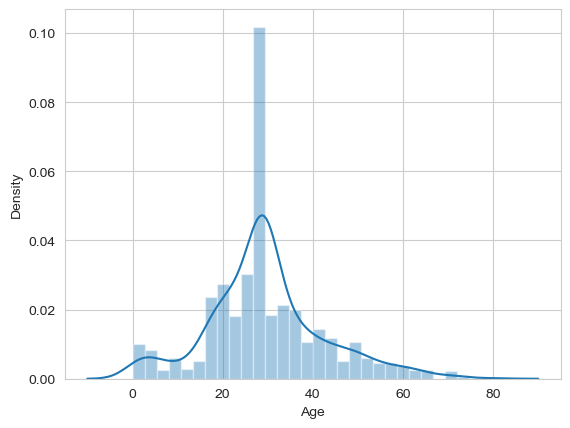

In [237]:
sns.distplot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())

#### Conclusion: Age is distributed mostly normally distributed

<Axes: >

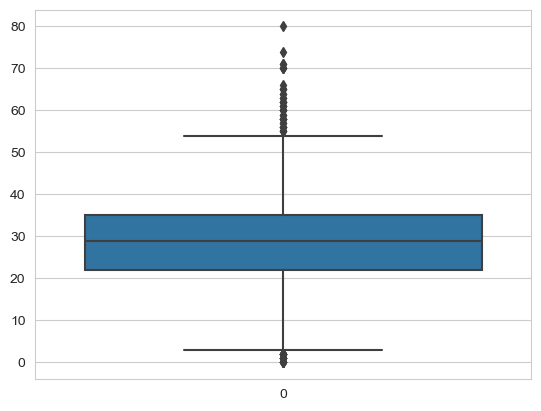

In [238]:
sns.boxplot(df['Age'])

#### Concusion: Here, Inter Quartile Range (IQR) ranges from 20 to 35 - outliers range (0 to 4) and (55 and above)

### Analysis on Fare column

C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_9460\398100842.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


4.787316519674893
33.39814088089868


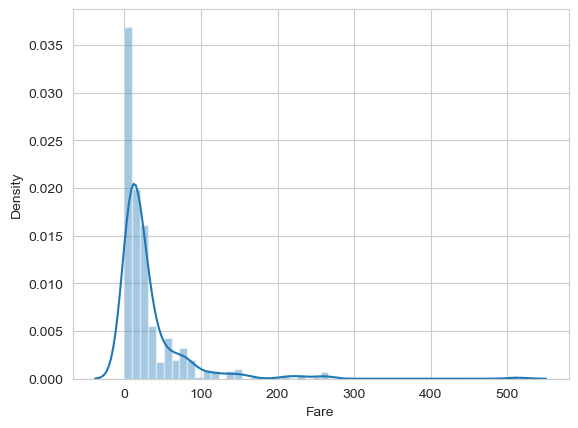

In [239]:
sns.distplot(df['Fare'])
print(df['Fare'].skew())
print(df['Fare'].kurt())

<Axes: >

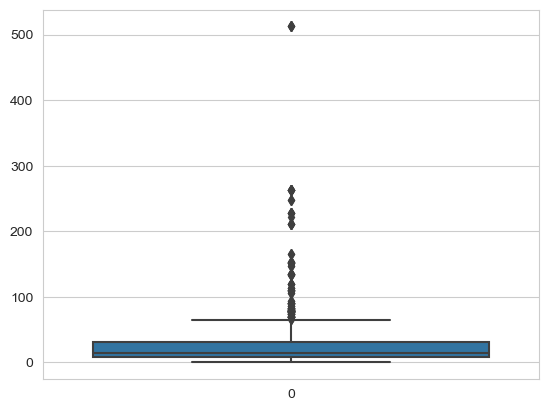

In [240]:
sns.boxplot(df['Fare'])

### Multivariate Analysis

#### Anaysis of Pclass and Survival 

In [241]:
#sns.countplot(df['Survived'], hue = df['Pclass'])
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis = 1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_9460\1842052792.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 0]['Age'])
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_9460\1842052792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexib

<Axes: xlabel='Age', ylabel='Density'>

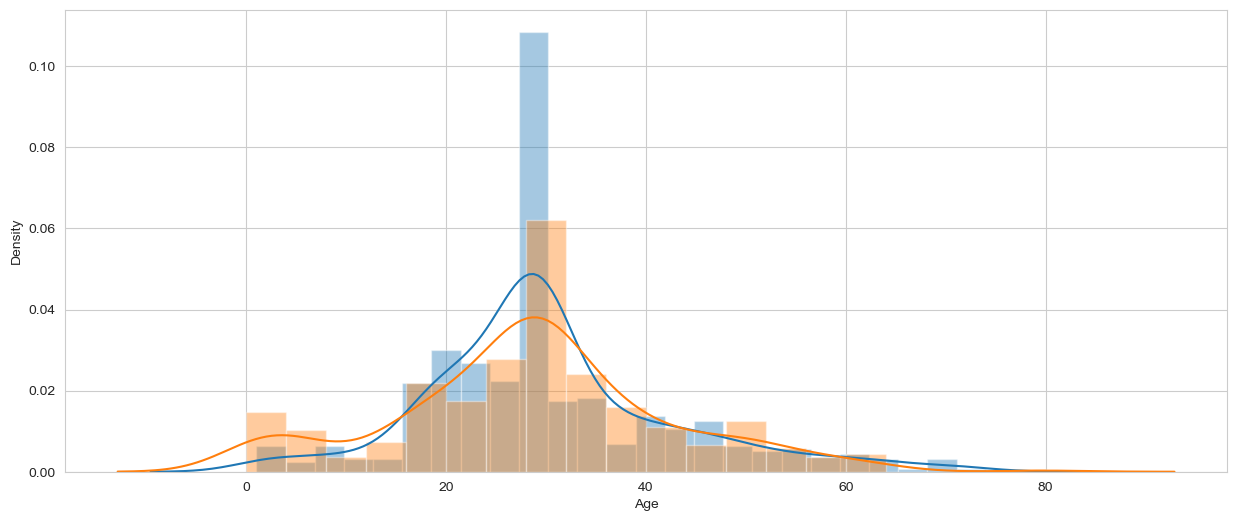

In [242]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived'] == 0]['Age'])
sns.distplot(df[df['Survived'] == 1]['Age'])

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

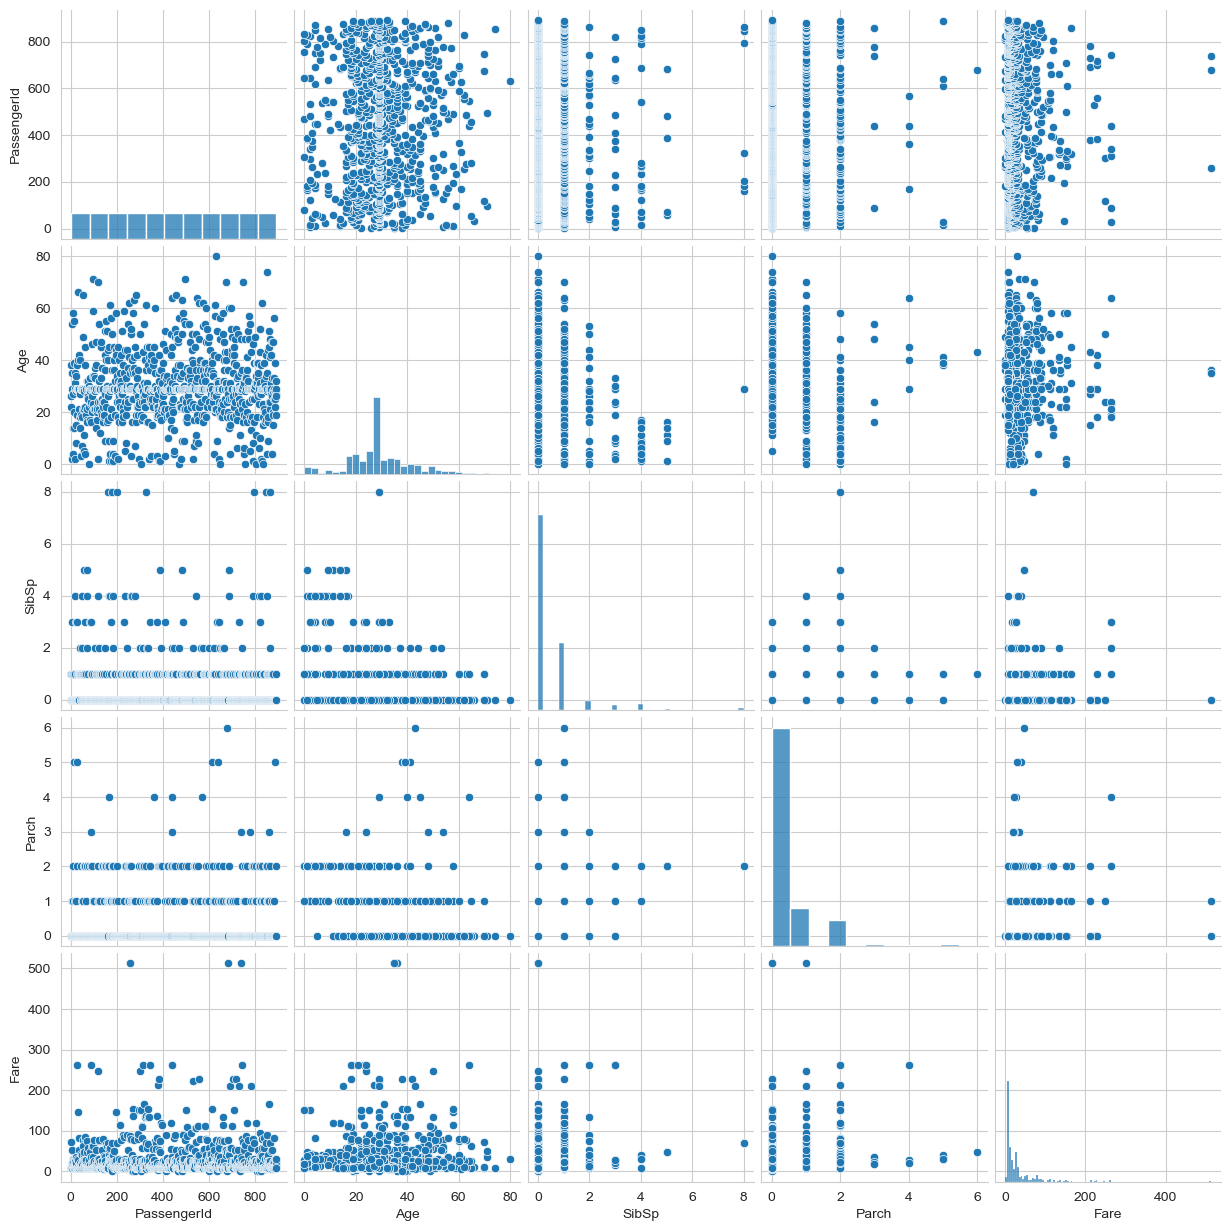

In [243]:
sns.pairplot(df)

#### Count of survived persons considereing Gender

E:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


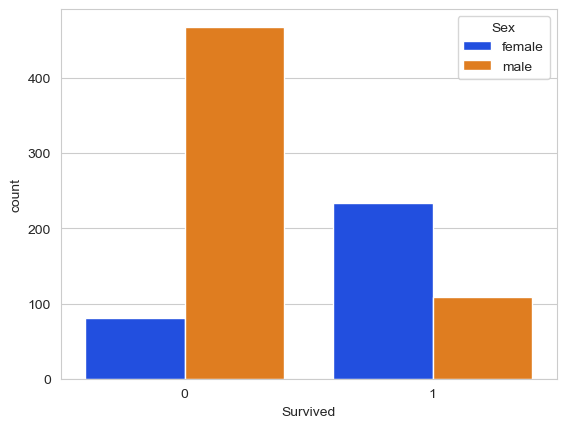

In [244]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='bright')
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis = 1)

C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_9460\1075173181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,color='darkblue',bins=40)


<Axes: xlabel='Age'>

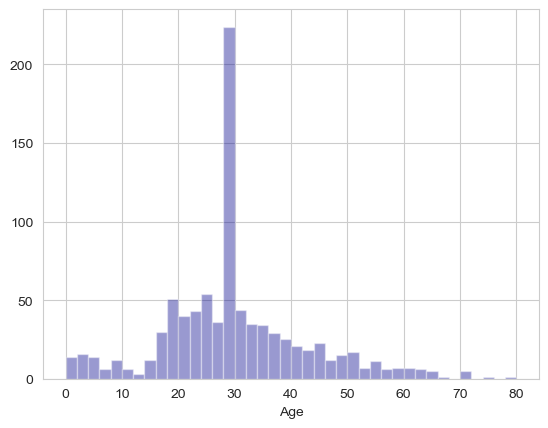

In [245]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkblue',bins=40)

<Axes: >

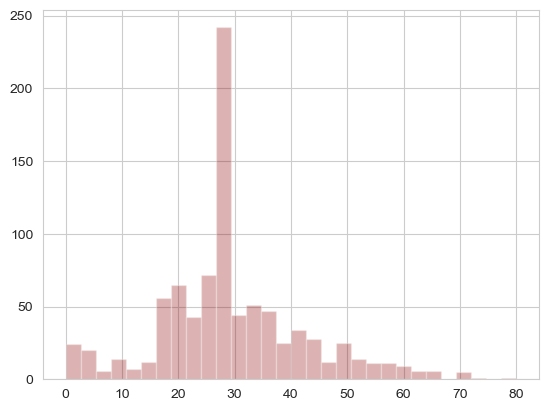

In [246]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

### Siblings count influence

<Axes: xlabel='SibSp', ylabel='count'>

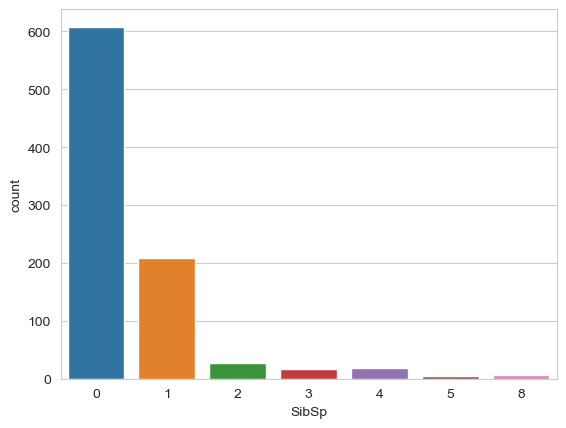

In [247]:
sns.countplot(x='SibSp',data=df)

<Axes: >

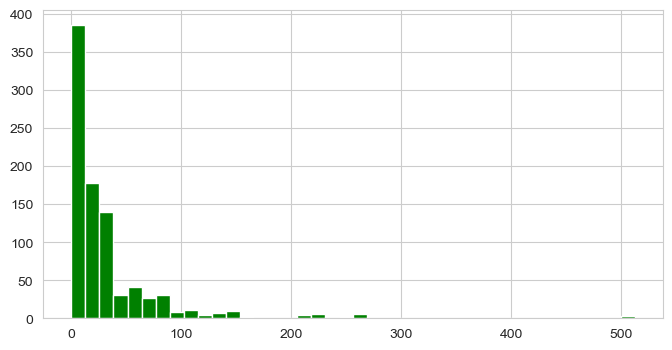

In [248]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

E:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Pclass', ylabel='Age'>

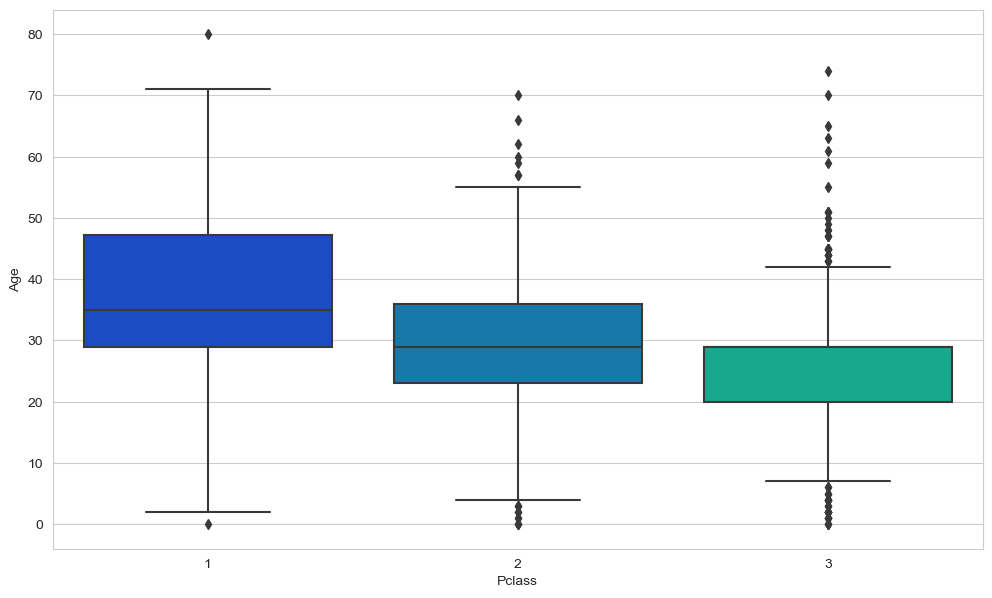

In [249]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

#### Converting Categorical Features

In [250]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [254]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


### Correlation Analysis

In [264]:
df.corr(numeric_only=True)

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.033741,-0.057527,-0.001652,0.012658
Age,0.033741,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.093856,0.159651,0.216225,1.000000


<Axes: >

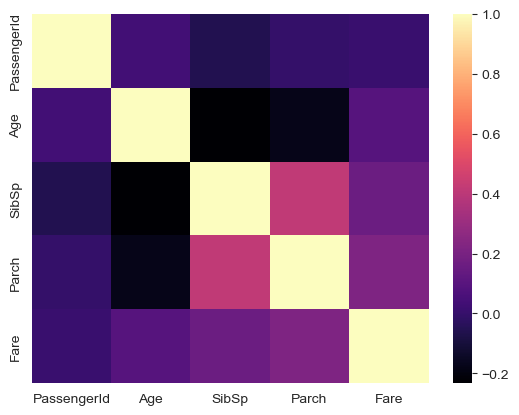

In [265]:
sns.heatmap(df.corr(numeric_only=True), cmap='magma')

### Final Conclusion: 

#### 1. Chance of Female survival is higher than male survival 
#### 2. Pclass 3 is the most fatal one becaue of least survival
#### 3. Passenger going to class C is the most 
#### 4. Passengers age is mostly normally distributed 
